<a href="https://colab.research.google.com/github/andrewwgordon/keras-minst-handwriting/blob/main/Keras-Minst-Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import the Google Tensorflow libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import keras

In [9]:
# Load the Minst Digit Handwriting dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()
# Print the shapes of the vectors
# (Should be 60000/10000 28x28 images)
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


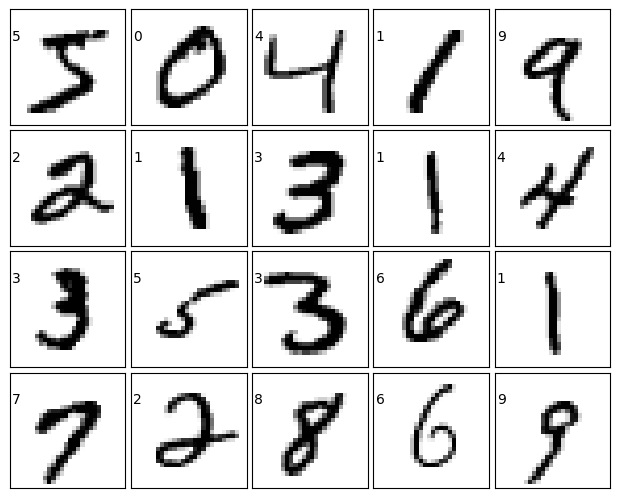

In [10]:
# Display the first 20 images of the training dataset
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(train_y[i]))

In [11]:
# Normalise the images
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

# Build a map between the training feature images and target class
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
# Cache the training dataset
ds_train = ds_train.cache()
# Shuffle the dataset
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
# Set a batch size for training at 128 images
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [12]:
# Build a map between the training feature images and target class
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [13]:
# Define the Neural Network architecture
# 3 layer model 28x28 input, middle dense layer, with 10x1 output
# Activation function of rectified linear unit
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
# Compile with Adam optimiser
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
# Fit and train the model and retain the model history
model_history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 10s 7ms/step - loss: 0.3524 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.1950 - val_sparse_categorical_accuracy: 0.9407
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1666 - sparse_categorical_accuracy: 0.9523 - val_loss: 0.1391 - val_sparse_categorical_accuracy: 0.9608
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1199 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.1101 - val_sparse_categorical_accuracy: 0.9680
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0936 - sparse_categorical_accuracy: 0.9724 - val_loss: 0.0964 - val_sparse_categorical_accuracy: 0.9704
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0747 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.0889 - val_sparse_categorical_accuracy: 0.9723
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0625 - sparse_categorical_acc

In [14]:
# Display the Neural Network architecture and sizes
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


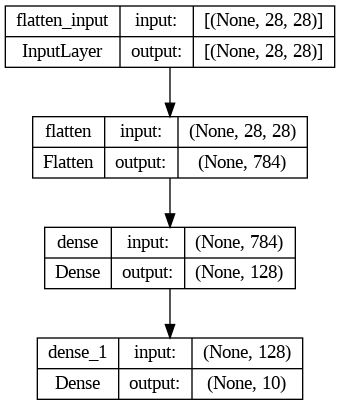

In [15]:
# Display the Neural Network as a diagram
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
# Display the loss and metrics of the model
loss_and_metrics = model.evaluate(test_X, test_y, verbose=2)

313/313 - 1s - loss: 13.3109 - sparse_categorical_accuracy: 0.9727 - 604ms/epoch - 2ms/step


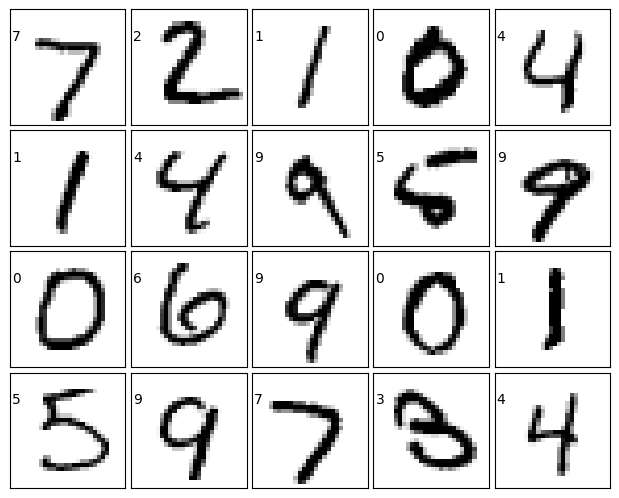

In [19]:
# Display the test images
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(test_y[i]))

In [20]:
# Build a list of predictions for the whole test dataset
predictions = model.predict([test_X])

313/313 [==============================] - 1s 2ms/step


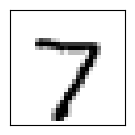

In [21]:
# Display the first image in the test series
# (Should be a number 7)
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
ax.imshow(test_X[0], cmap=plt.cm.binary, interpolation='nearest')

In [23]:
# Display the prediction of the first image in the test series
# (Should be the number 7)
import numpy as np
np.argmax(predictions[0])

7

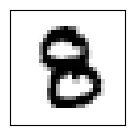

In [26]:
# Select a random image and display it
import random
n = random.randint(0,10000)
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
ax.imshow(test_X[n], cmap=plt.cm.binary, interpolation='nearest')

In [27]:
# Display the prediction of the first image in the test series
np.argmax(predictions[n])

8

In [28]:
# Persist the model to support, for example, an API service
model.save('./minst-digits.keras')